In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image as keras_image
import numpy as np
import cv2



In [11]:
from tensorflow.keras.optimizers import Adam

model_path = r'C:\Users\HI\Desktop\Age-Gender_Detector\Age_Sex_Detection.keras'

# Load the model without optimizer state
model = tf.keras.models.load_model(model_path, compile=False)

# Recompile the model with the desired optimizer
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
height = 48
width = 48

In [13]:
# Choose an image from the test set
image = r'C:\Users\HI\Downloads\13.jfif'  # Assuming X_test is preprocessed # Use the correct target size

In [14]:
# Read the image using OpenCV
img = cv2.imread(image)
if img is None:
    raise FileNotFoundError(f"Image at path {image} not found.")


In [15]:
# Convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Resize the image to match the input size of the model
img = cv2.resize(img, (width, height))

In [16]:
# Convert to array and preprocess
img_array = keras_image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize if required

In [17]:
# Specify the layer to visualize
layer_name = 'conv2d_2'  # Change to the desired convolutional layer name
intermediate_layer_model = tf.keras.models.Model(inputs=model.input,outputs=model.get_layer(layer_name).output)

In [18]:
# Predict
try:
    activations = intermediate_layer_model.predict(img_array)
    print("Activations shape:", activations.shape)
except ValueError as e:
    print(f"Error during prediction: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Activations shape: (1, 12, 12, 128)


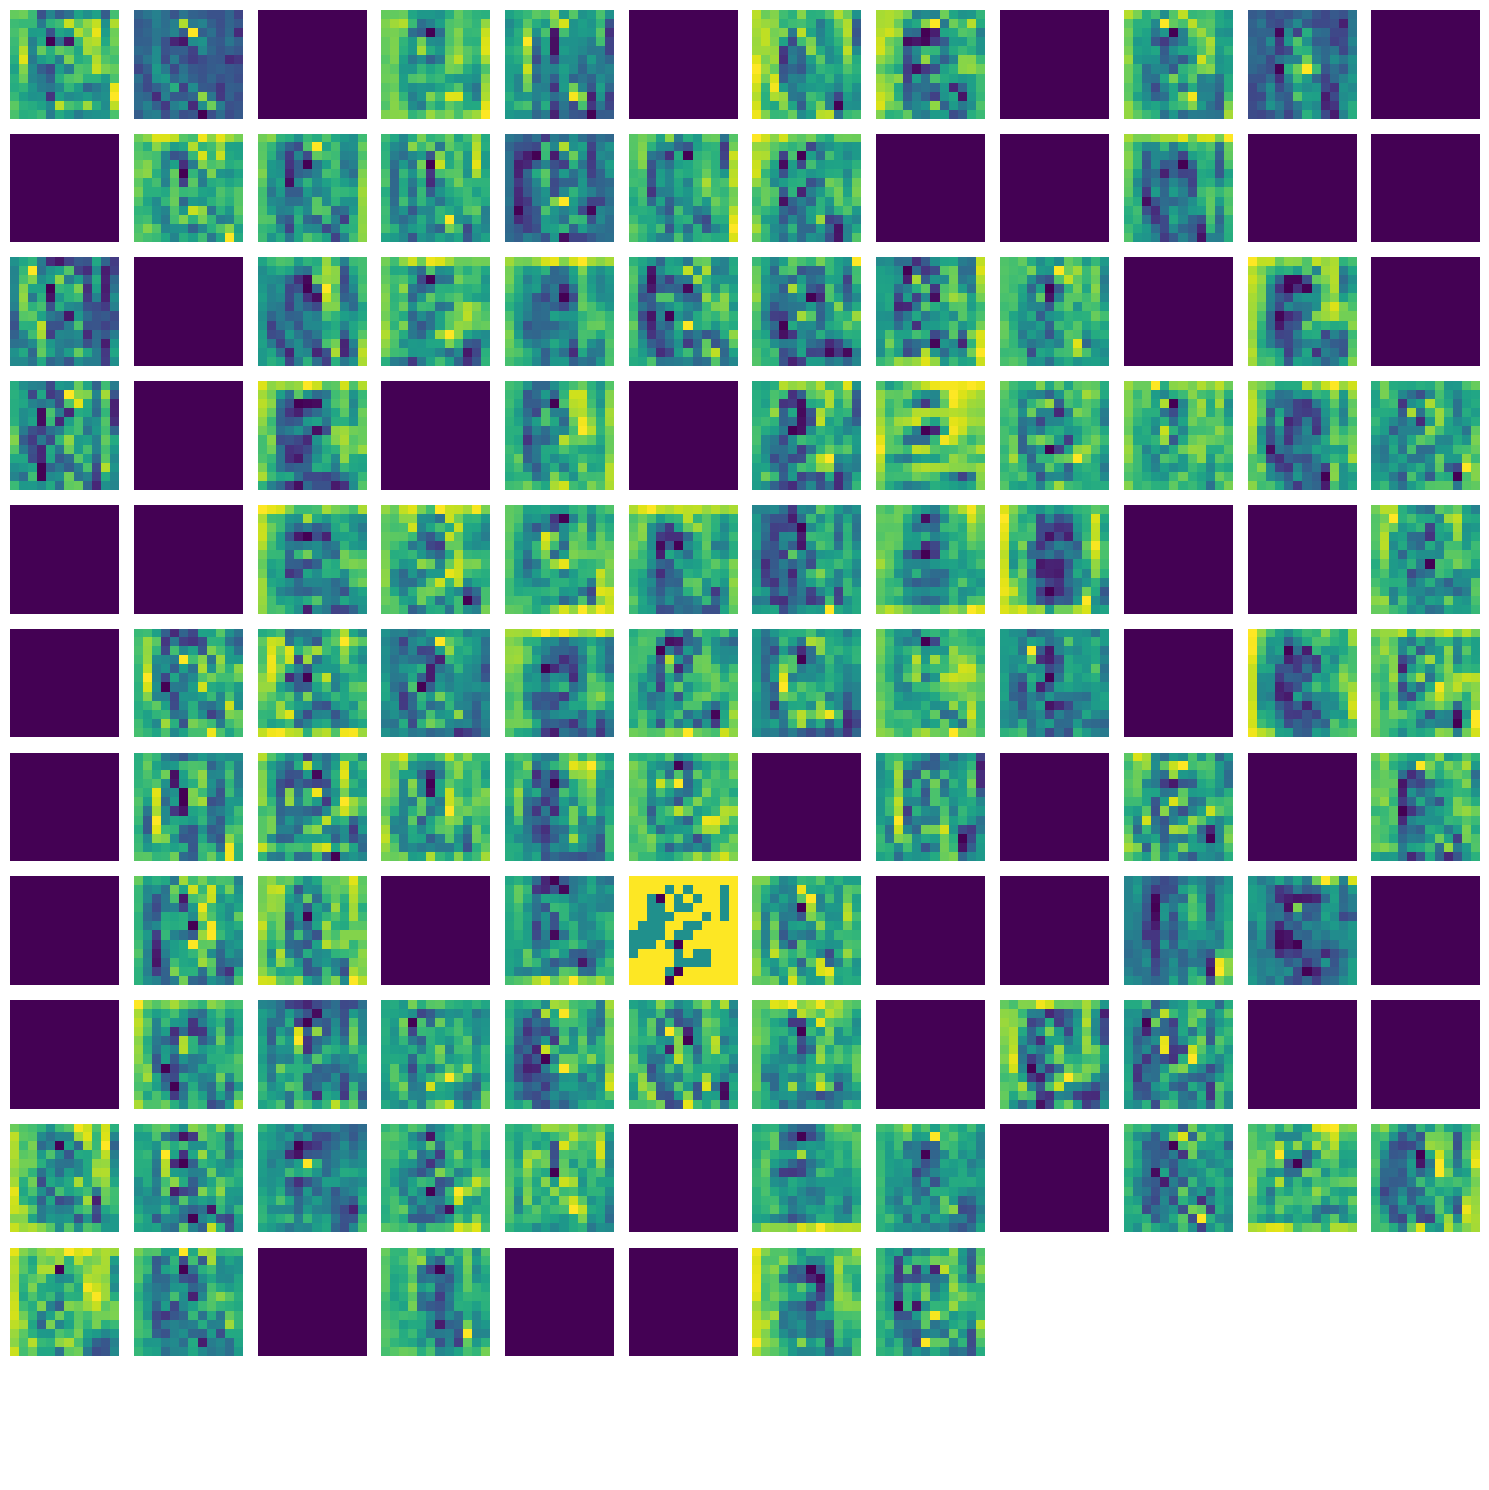

In [19]:
import matplotlib.pyplot as plt

def visualize_activation_maps(activations):
    # Determine the number of activation maps
    num_maps = activations.shape[-1]
    size = activations.shape[1]
    
    # Calculate grid size for displaying maps
    grid_size = int(np.ceil(np.sqrt(num_maps)))
    
    # Create a grid of subplots
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
    
    for i in range(grid_size * grid_size):
        if i < num_maps:
            ax = axes[i // grid_size, i % grid_size]
            ax.imshow(activations[0, :, :, i], cmap='viridis')
            ax.axis('off')
        else:
            axes[i // grid_size, i % grid_size].axis('off')
    
    plt.tight_layout()
    plt.show()

# Assuming `activations` is already computed
visualize_activation_maps(activations)
